# **Tugas 2 Machine Learning - Linear Regression**
# Kelompok 7
## Anggota:
*   Nazwa Salsabila (2208107010010)
*   Rizky Yusmansyah (2208107010024)
*   Della Rahmatika (2208107010041)
*   Zuwi Pertiwi (2208107010061)
*   Berliani Utami (2208107010082)

## **Deskripsi Dataset:**
Dataset yang dipilih yaitu Personalized Medical Diet Recommendations Dataset yang bersumber dari kaggle. Dataset ini dipilih karena fitur-fitur yang ada memenuhi syarat dataset yang diminta pada tugas. Fitur utama pada data mencakup:
1.   Data Demografi Pasien (Age, gender, height, weight, and BMI)
2.   Riwayat Kesehatan (Chronic diseases, blood pressure, cholesterol, and genetic risk factors)
3.   Gaya Hidup (Daily steps, exercise frequency, sleep quality, alcohol and smoking habits)
4.   Asupan Makanan (Caloric, protein, carbohydrate, and fat consumption)
5.   Preferensi & Pantangan Makanan ( Dietary habits, cuisine preferences, and food aversions)
6.   Data Wearable Device (Average heart rate, sleep quality, and activity level)
7.   Rekomendasi Diet

Namun, tidak semua fitur yang ada akan digunakan, meyesuaikan kembali dengan kebutuhan fitur berdasarkan target serta memperkecil dimensi data dengan menyeleksi fitur yang diperlukan.

Link dataset: https://www.kaggle.com/datasets/ziya07/personalized-medical-diet-recommendations-dataset/data

Link Repository : https://github.com/rizkyyus/Kelompok_7_Tugas02_Linear_Regression


# Data Loading
Mengimport semua library yang diperlukan untuk melakukan analisis data dan membangun model regresi linear. pandas dan numpy digunakan untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, lalu sklearn menyediakan berbagai alat untuk preprocessing, pelatihan model, pipeline, dan evaluasi performa model.

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Memuat atau mengimpor dataset yang digunakan ke dalam lingkungan pemrograman melalui URL dataset yang sudah di upload ke repository GitHub

In [262]:
# URL dataset
url = "https://raw.githubusercontent.com/rizkyyus/Kelompok_7_Tugas02_Linear_Regression/refs/heads/main/Personalized_Diet_Recommendations.csv"

# Membaca dataset langsung dari URL
df = pd.read_csv(url)

# Pemahaman Dataset
Pada tahap ini, langkah yang dilakukan adalah memahami dataset dengan menampilkan statistik deskriptif dan visualisasi awal data.

In [263]:
# Menampilkan 5 baris pertama
df.head()

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,105,179,143,Western,NaN,2150,108,139,145,High-Protein Diet
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,69,315,75,Mediterranean,NaN,1527,74,266,80,Balanced Diet
2,P00003,46,Female,172,119,40.22,NaN,137,101,171,...,183,103,148,Western,Sweet,2359,180,145,143,High-Protein Diet
3,P00004,32,Female,197,118,30.41,NaN,148,91,258,...,135,371,120,Western,NaN,2858,137,378,135,High-Protein Diet
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,167,298,48,Indian,Spicy,1937,166,317,56,High-Protein Diet


In [264]:
# Menampilkan jumlah baris dan kolom
df.shape

(5000, 30)

In [265]:
# Menampilkan informasi tentang kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                5000 non-null   object 
 1   Age                       5000 non-null   int64  
 2   Gender                    5000 non-null   object 
 3   Height_cm                 5000 non-null   int64  
 4   Weight_kg                 5000 non-null   int64  
 5   BMI                       5000 non-null   float64
 6   Chronic_Disease           2957 non-null   object 
 7   Blood_Pressure_Systolic   5000 non-null   int64  
 8   Blood_Pressure_Diastolic  5000 non-null   int64  
 9   Cholesterol_Level         5000 non-null   int64  
 10  Blood_Sugar_Level         5000 non-null   int64  
 11  Genetic_Risk_Factor       5000 non-null   object 
 12  Allergies                 1503 non-null   object 
 13  Daily_Steps               5000 non-null   int64  
 14  Exercise

In [266]:
# Statistik deskriptif
print(df.describe(include="all"))

       Patient_ID          Age  Gender    Height_cm   Weight_kg          BMI  \
count        5000  5000.000000    5000  5000.000000  5000.00000  5000.000000   
unique       5000          NaN       3          NaN         NaN          NaN   
top        P05000          NaN  Female          NaN         NaN          NaN   
freq            1          NaN    1695          NaN         NaN          NaN   
mean          NaN    48.805600     NaN   174.244000    84.36620    28.353134   
std           NaN    17.906991     NaN    14.229173    20.18103     8.297745   
min           NaN    18.000000     NaN   150.000000    50.00000    12.630000   
25%           NaN    34.000000     NaN   162.000000    67.00000    21.850000   
50%           NaN    49.000000     NaN   174.000000    84.00000    27.640000   
75%           NaN    64.000000     NaN   186.000000   102.00000    33.812500   
max           NaN    79.000000     NaN   199.000000   119.00000    52.890000   

       Chronic_Disease  Blood_Pressure_

**Visualisasi Distribusi Fitur:**

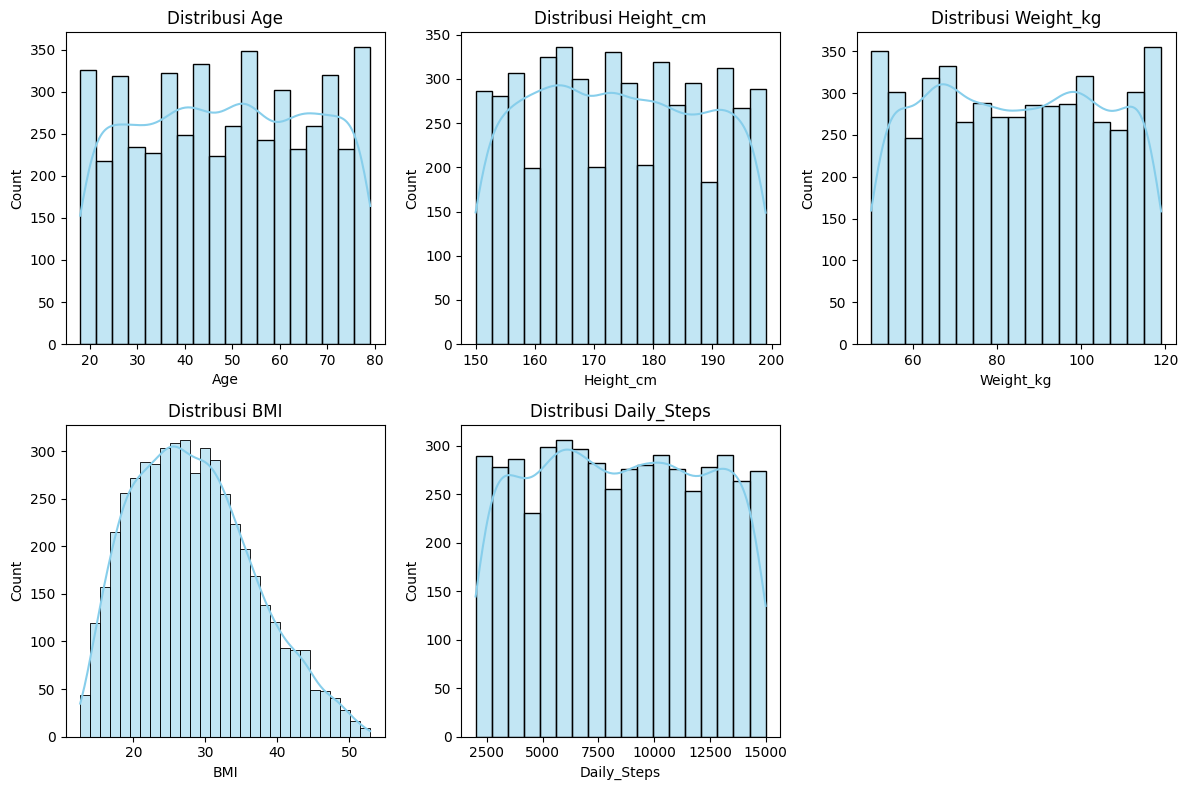

In [267]:
# Histogram Distribusi Fitur Numerik
numeric_features = ['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    # Replace data with df
    sns.histplot(df[feature].dropna(), kde=True, color='skyblue')
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

Secara keseluruhan, distribusi fitur numerik di atas cukup baik dan seimbang. Tidak ada fitur yang terlalu skewed (kecuali mungkin sedikit pada BMI), dan tidak tampak outlier ekstrem.

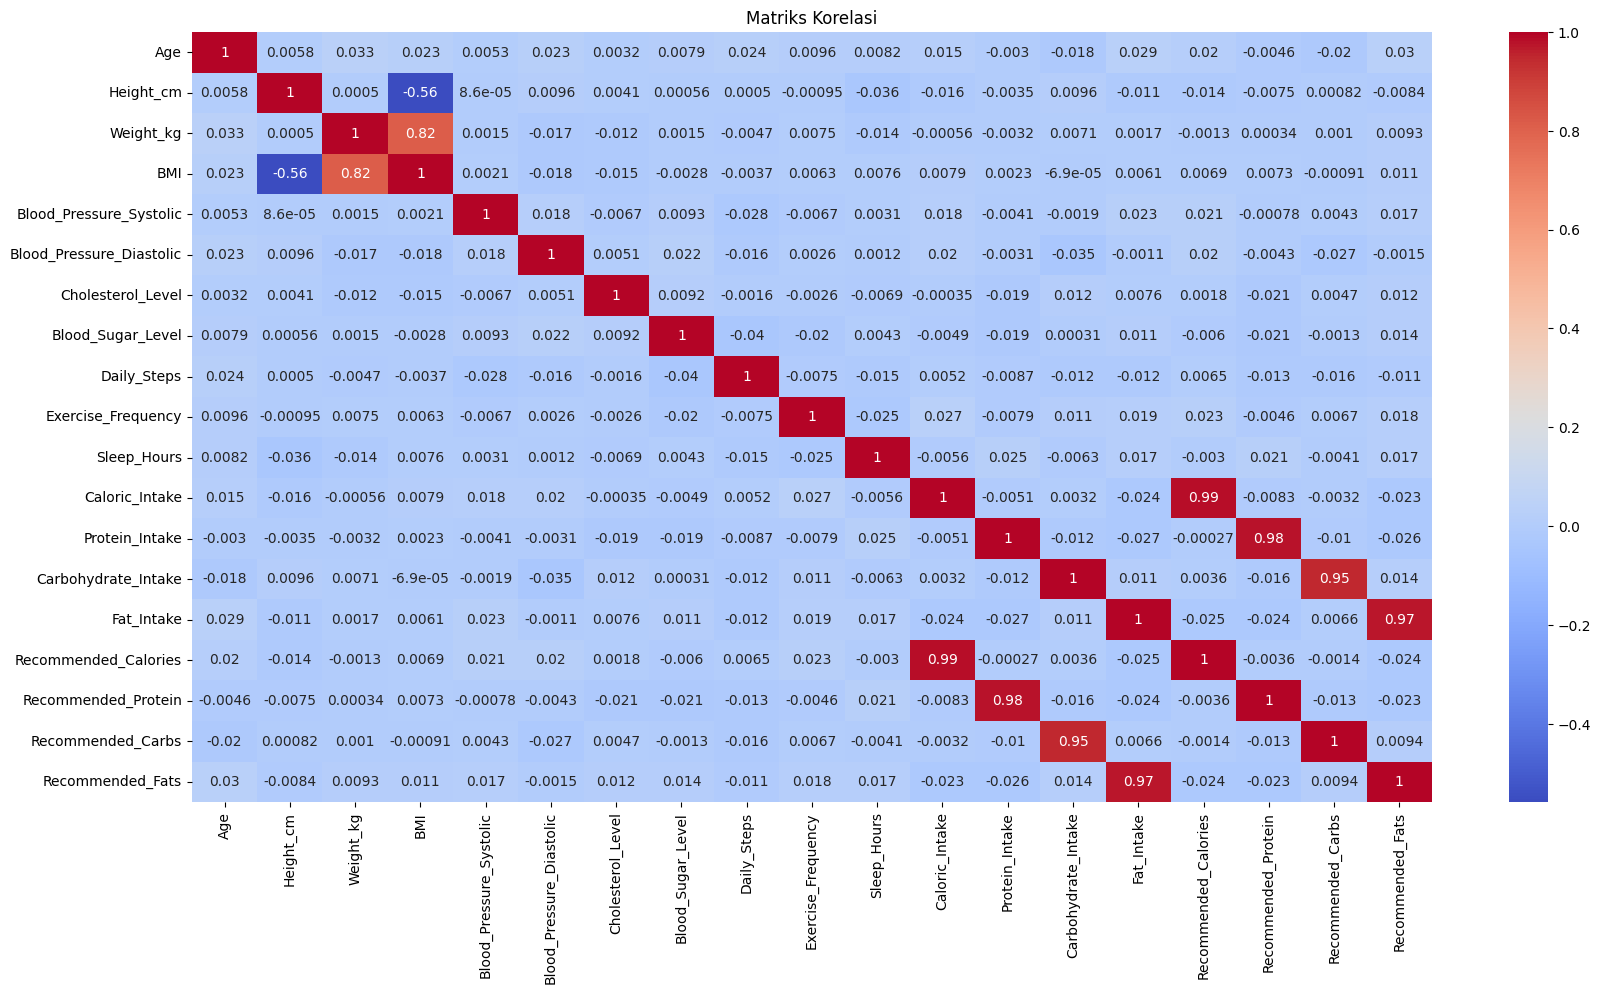

In [268]:
plt.figure(figsize=(20,10))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

Dari heatmap korelasi, terlihat bahwa BMI paling dipengaruhi oleh berat badan (positif) dan tinggi badan (negatif). Aktivitas olahraga juga berpengaruh, meski lebih lemah. Asupan kalori, protein, dan lainnya korelasinya lemah.

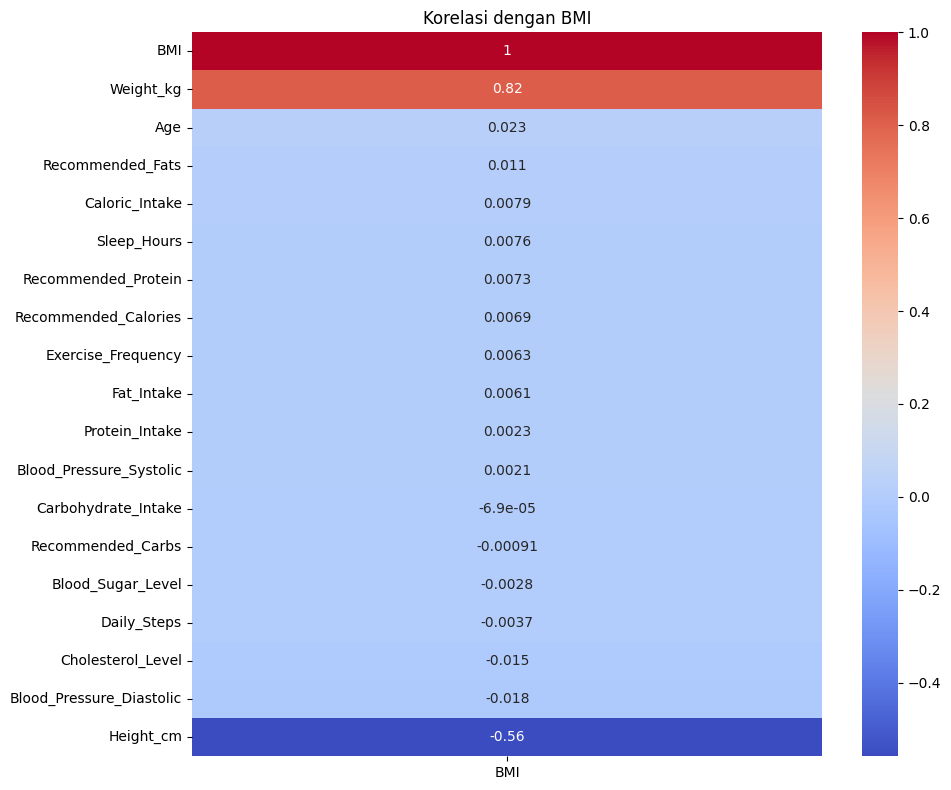

In [269]:
# Korelasi numerik dengan target
numerik = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(numerik[['BMI']].sort_values('BMI', ascending=False), annot=True, cmap='coolwarm')
plt.title('Korelasi dengan BMI')
plt.tight_layout()
plt.show()

# Eksplorasi Data dan Pra-pemrosesan
Pada tahap ini, akan dilakukan eksplorasi data lebih lanjut dengan pembersihan atau penanganan dataset seperti missing value, outlier, data duplikasi, normalisasi atau standarisasi, analisis korelasi, dan menghapus beberapa fitur yang tidak digunakan.

In [270]:
# Mengecek jumlah duplikasi
print(df.duplicated().sum())

0


In [271]:
# Cek missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Patient_ID                     0
Age                            0
Gender                         0
Height_cm                      0
Weight_kg                      0
BMI                            0
Chronic_Disease             2043
Blood_Pressure_Systolic        0
Blood_Pressure_Diastolic       0
Cholesterol_Level              0
Blood_Sugar_Level              0
Genetic_Risk_Factor            0
Allergies                   3497
Daily_Steps                    0
Exercise_Frequency             0
Sleep_Hours                    0
Alcohol_Consumption            0
Smoking_Habit                  0
Dietary_Habits                 0
Caloric_Intake                 0
Protein_Intake                 0
Carbohydrate_Intake            0
Fat_Intake                     0
Preferred_Cuisine              0
Food_Aversions              1225
Recommended_Calories           0
Recommended_Protein            0
Recommended_Carbs              0
Recommended_Fats               0
Recommended_Meal_Plan     

Mengecek outlier pada dataset yang bertipe numerik

In [272]:
# Ambil fitur numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns="BMI").columns

# Deteksi outlier menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Tampilkan jumlah outlier per kolom numerik
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
Height_cm: 0 outliers
Weight_kg: 0 outliers
Blood_Pressure_Systolic: 0 outliers
Blood_Pressure_Diastolic: 0 outliers
Cholesterol_Level: 0 outliers
Blood_Sugar_Level: 0 outliers
Daily_Steps: 0 outliers
Exercise_Frequency: 0 outliers
Sleep_Hours: 0 outliers
Caloric_Intake: 0 outliers
Protein_Intake: 0 outliers
Carbohydrate_Intake: 0 outliers
Fat_Intake: 0 outliers
Recommended_Calories: 0 outliers
Recommended_Protein: 0 outliers
Recommended_Carbs: 0 outliers
Recommended_Fats: 0 outliers


## Hapus Fitur yang Tidak Digunakan
Beberapa fitur dihapus karena ingin memfokuskan hubungan antara fitur yang berkaitan dengan tinggi badan, berat badan, pola makan, dan aktivitas sehari-hari dengan target prediksi yaitu BMI.

Fitur yang dihapus:

*   Kolom kesehatan: Chronic_Disease, Blood_Pressure_Systolic,
*   Blood_Pressure_Diastolic, Cholesterol_Level, Blood_Sugar_Level, Genetic_Risk_Factor
*   Kolom rekomendasi diet: Recommended_Calories, Recommended_Protein, Recommended_Carbs, Recommended_Fats, Recommended_Meal_Plan
*   kolom Preferred_Cuisine, Food_Aversions, Allergies, dan ID




In [273]:
# Hapus fitur yang tidak relevan
columns_to_drop = [
    "Chronic_Disease", "Blood_Pressure_Systolic", "Blood_Pressure_Diastolic",
    "Cholesterol_Level", "Blood_Sugar_Level", "Genetic_Risk_Factor",
    "Recommended_Calories", "Recommended_Protein", "Recommended_Carbs",
    "Recommended_Fats", "Recommended_Meal_Plan", "Preferred_Cuisine","Food_Aversions", "Allergies", "Patient_ID"
]

df_cleaned = df.drop(columns=columns_to_drop)

# Tampilkan informasi dataset setelah pembersihan
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   Gender               5000 non-null   object 
 2   Height_cm            5000 non-null   int64  
 3   Weight_kg            5000 non-null   int64  
 4   BMI                  5000 non-null   float64
 5   Daily_Steps          5000 non-null   int64  
 6   Exercise_Frequency   5000 non-null   int64  
 7   Sleep_Hours          5000 non-null   float64
 8   Alcohol_Consumption  5000 non-null   object 
 9   Smoking_Habit        5000 non-null   object 
 10  Dietary_Habits       5000 non-null   object 
 11  Caloric_Intake       5000 non-null   int64  
 12  Protein_Intake       5000 non-null   int64  
 13  Carbohydrate_Intake  5000 non-null   int64  
 14  Fat_Intake           5000 non-null   int64  
dtypes: float64(2), int64(9), object(4)
mem

Setelah menghapus beberapa fitur, masalah missing value juga sudah ikut tertangani.

In [274]:
# Mengecek kembali missing values
print(df_cleaned.isnull().sum())

Age                    0
Gender                 0
Height_cm              0
Weight_kg              0
BMI                    0
Daily_Steps            0
Exercise_Frequency     0
Sleep_Hours            0
Alcohol_Consumption    0
Smoking_Habit          0
Dietary_Habits         0
Caloric_Intake         0
Protein_Intake         0
Carbohydrate_Intake    0
Fat_Intake             0
dtype: int64


## Preprocessing

Memilih fitur-fitur yang akan digunakan untuk modeling dan menyimpan dala data frame dengan nama df_selected.

In [275]:
# Kolom yang akan digunakan
selected_columns = [
    "Age", "Gender", "Height_cm", "Weight_kg", "Daily_Steps",
    "Exercise_Frequency", "Sleep_Hours", "Alcohol_Consumption",
    "Smoking_Habit", "Dietary_Habits", "Caloric_Intake",
    "Protein_Intake", "Carbohydrate_Intake", "Fat_Intake", "BMI"
]

# Ambil subset dari df_cleaned
df_selected = df_cleaned[selected_columns].copy()

Memisahkan fitur dan target yaitu nilai BMI

In [276]:
# Pisahkan fitur dan target
X = df_selected.drop(columns="BMI")
y = df_selected["BMI"]

Memisahkan fitur dalam dataset menjadi dua jenis, yaitu kategorikal dan numerikal untuk membuat preprocessing pipeline, di mana fitur kategorikal dan numerik diproses dengan metode yang berbeda, lalu digabung kembali untuk digunakan dalam model machine learning.

In [277]:
# Tentukan kolom kategorikal dan numerikal
categorical_features = ["Gender", "Alcohol_Consumption", "Smoking_Habit", "Dietary_Habits"]
numeric_features = X.drop(columns=categorical_features).columns.tolist()

Membuat sebuah pipeline preprocessing yang otomatis menormalisasi kolom numerik dengan StandardScaler, dan mengubah kolom kategorikal menjadi angka menggunakan OneHotEncoder.

In [278]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

Memisahkan antara data training dan data testing untuk proses pemodelan. Dataset dibagi menjadi 80% data latih dan 20% data uji. random_state=42 digunakan untuk memastikan pembagian data konsisten.

In [279]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Jumlah data training: 4000
Jumlah data testing: 1000


Menerapkan preprocessing yang sudah dibuat sebelumnya ke data latih dan data uji. Data latih diproses dengan fit_transform untuk menyesuaikan skala dan encoding, sedangkan data uji hanya ditransformasi dengan aturan yang sama agar siap digunakan oleh model machine learning.

In [280]:
# Transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Melihat isi DataFrame baru dari hasil preprocessing

In [281]:
# Ambil nama kolom dari masing-masing transformer
num_cols = numeric_features
cat_cols = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)

# Gabungkan semua nama kolom
all_feature_names = list(num_cols) + list(cat_cols)

# Buat DataFrame dari hasil transformasi
X_train_df = pd.DataFrame(
    X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed,
    columns=all_feature_names,
    index=X_train.index
)

# Tampilkan beberapa baris pertama
print(X_train_df.head())
print(X_train_df.info())

           Age  Height_cm  Weight_kg  Daily_Steps  Exercise_Frequency  \
4227  0.350166   1.118296  -1.451792    -0.353896           -1.499909   
4676 -0.095976  -1.133779   0.338763    -1.344050           -0.500969   
800  -1.099797   1.751693  -0.954415    -0.280532           -1.499909   
3671  0.015559   0.836787  -0.108876    -0.870105            1.496912   
4193 -0.542119  -0.711515  -0.357564    -1.262711           -1.499909   

      Sleep_Hours  Caloric_Intake  Protein_Intake  Carbohydrate_Intake  \
4227     0.750488       -0.322953       -0.611692            -1.127647   
4676     1.042631        1.303873       -1.680139             1.250533   
800      0.224629        0.297151        0.317393             0.257701   
3671    -1.703519       -1.300868       -0.286512             0.707939   
4193     0.984203       -1.447934       -1.680139             1.550692   

      Fat_Intake  Gender_Male  Gender_Other  Alcohol_Consumption_Yes  \
4227    0.414474          1.0           0.0 

# Implementasi Model
Tahap ini adalah tahapan dalam membangun model Linear Regression dan Polynomial Regression. Pada Polynomial Regression, akan dipilih derajat polinomial yang sesuai dengan dataset.

## Linear Regression

Membangun model regresi linear sederhana untuk melihat hubungan fitur BMI berdasarkan data fitur terpilih.

In [282]:
# Inisialisasi dan training
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)

# Prediksi
y_pred_linear = lin_reg.predict(X_test_processed)

# Evaluasi
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Tampilkan hasil evaluasi
print(f"Linear Regression - MSE: {mse_linear:.2f}, MAE: {mae_linear:.2f}, R2: {r2_linear:.2f}")

Linear Regression - MSE: 1.67, MAE: 0.98, R2: 0.98


Berdasarkan hasil evaluasi, diperoleh MSE sebesar 1.67 dan MAE sebesar 0.98, yang menunjukkan bahwa rata-rata kesalahan prediksi model sangat kecil. Nilai R² sebesar 0.98 berarti model mampu menjelaskan 98% variasi dalam data target, yang menandakan performa model sangat baik dan prediksinya sangat mendekati nilai sebenarnya.

## Validasi Model Linear Regression

Melakukan validasi model Linear Regression menggunakan cross-validation untuk mengukur konsistensi performa model dengan teknik 5-fold cross-validation, di mana data latih dibagi menjadi 5 bagian dan model dilatih serta diuji sebanyak 5 kali, bergantian.

In [283]:
# Pipeline linear regression (dengan preprocessing aja)
linear_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("lin_reg", LinearRegression())
])

# Cross-validation (pakai 5-fold)
cv_scores_linear = cross_val_score(linear_pipeline, X_train, y_train, cv=5, scoring='r2')

# Tampilkan hasil
print(f"Cross-validated R2 scores (Linear Regression): {cv_scores_linear}")
print(f"Mean CV R2: {cv_scores_linear.mean():.2f}")

Cross-validated R2 scores (Linear Regression): [0.97679579 0.97552707 0.97795048 0.97767251 0.9776167 ]
Mean CV R2: 0.98


Hasil cross-validation menunjukkan skor R² pada setiap fold yang berada di kisaran 0.97 hingga 0.98. Rata-rata skor R² adalah 0.98 yang menunjukkan model stabil dan konsisten. Model tidak hanya bagus di data uji awal, tetapi juga tetap akurat dalam skenario validasi silang.

## Polynomial Regression

Membangun dan mengevaluasi model Polynomial Regression untuk menangkap hubungan non-linear antara fitur dan target.

In [284]:
poly_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("poly", PolynomialFeatures(degree=2)),
    ("reg", LinearRegression())
])

# Training
poly_pipeline.fit(X_train, y_train)

# Prediksi
y_pred_poly = poly_pipeline.predict(X_test)

# Evaluasi
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Output hasil evaluasi
print(f"Polynomial Regression - MSE: {mse_poly:.2f}, MAE: {mae_poly:.2f}, R2: {r2_poly:.2f}")

Polynomial Regression - MSE: 0.02, MAE: 0.11, R2: 1.00


Hasil evaluasi menunjukkan nilai MSE sebesar 0.02, MAE sebesar 0.11, dan R² sebesar 1.00, yang berarti model sangat akurat dan mampu menjelaskan hampir seluruh variasi dalam data target. Nilai R² yang sempurna menunjukkan bahwa Polynomial Regression dengan derajat 2 berhasil menangkap pola data yang mungkin tidak bisa ditangkap oleh model linear biasa. Namun, perlu dicurigai terjadinnya overfitting dan dilakukan pengecekan lebih lanjut.

## Validasi Model Polynomial Regression

Membangun model Polynomial Regression dengan Ridge Regularization menggunakan pipeline, yaitu preprocessing data, membentuk fitur polinomial derajat 2, dan menerapkan model Ridge Regression untuk mengurangi overfitting dengan menambahkan penalti terhadap koefisien yang terlalu besar.

In [285]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Buat pipeline polynomial + Ridge regression
ridge_poly_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("poly", PolynomialFeatures(degree=2)),
    ("ridge", Ridge(alpha=1.0))  # kamu bisa coba alpha=0.1, 1, 10
])

# Fit ke training data
ridge_poly_pipeline.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_ridge = ridge_poly_pipeline.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Polynomial Ridge Regression - MSE: {mse_ridge:.2f}, MAE: {mae_ridge:.2f}, R2: {r2_ridge:.2f}")

Polynomial Ridge Regression - MSE: 0.02, MAE: 0.11, R2: 1.00


Hasil evaluasi menunjukkan MSE = 0.02, MAE = 0.11, dan R² = 1.00, yang artinya performa model sangat baik dan setara dengan Polynomial Regression sebelumnya. Ridge Regression menjaga model tetap akurat dan menghindari kompleksitas berlebih.

In [286]:
cv_scores = cross_val_score(ridge_poly_pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R2 scores: {cv_scores}")
print(f"Mean CV R2: {cv_scores.mean():.2f}")

Cross-validated R2 scores: [0.99971411 0.99970133 0.99971998 0.99970948 0.9997053 ]
Mean CV R2: 1.00


Mencoba melakukan validasi model Polynomial Ridge Regression menggunakan teknik 5-fold cross-validation untuk menguji seberapa konsisten dan stabil performa model pada data yang berbeda. Hasil cross-validation juga menunjukkan bahwa skor R² di setiap fold sangat tinggi, mendekati 1.00, dan rata-rata R²-nya juga 1.00.

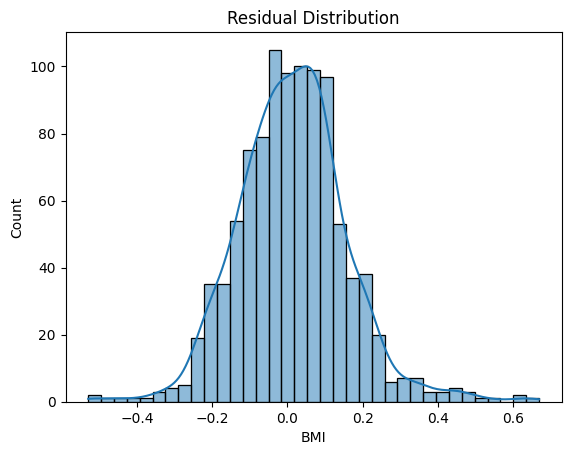

In [287]:
residuals = y_test - y_pred_poly
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

Plot residual menunjukkan distribusi error yang simetris dan menyerupai bentuk normal, dengan pusat di sekitar nol, selisih antara prediksi dan nilai asli rata-rata kecil dan menyebar seimbang. Sebagian besar prediksi mendekati nilai sebenarnya, dan tidak terlihat outlier besar. Sehingga model sudah cukup stabil dan tidak overfitting.

# Evaluasi Model

## Evaluasi Linear Regression

Visualisasi Prediksi vs Data Sebenarnya

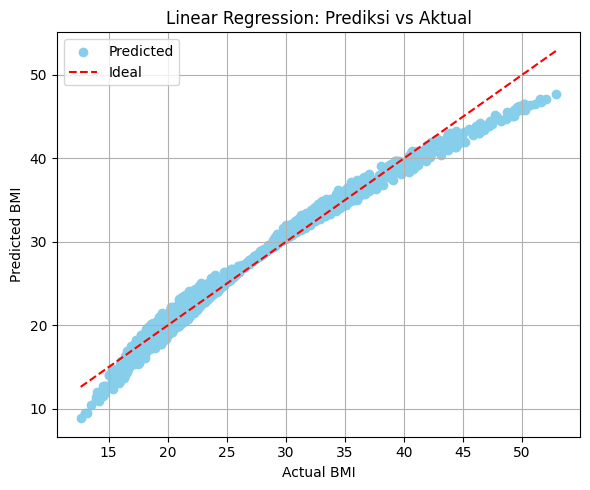

In [288]:
# Visualisasi
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_linear, color='skyblue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title("Linear Regression: Prediksi vs Aktual")
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Sebagian besar titik berada sangat dekat dengan garis ideal, menandakan bahwa model Linear Regression sudah melakukan prediksi dengan tingkat akurasi yang tinggi dan mampu menangkap pola hubungan antara fitur dan BMI dengan cukup baik. Beberapa titik sedikit menyimpang, tetapi secara umum model ini stabil dan akurat.

Distribusi error pada linear regression

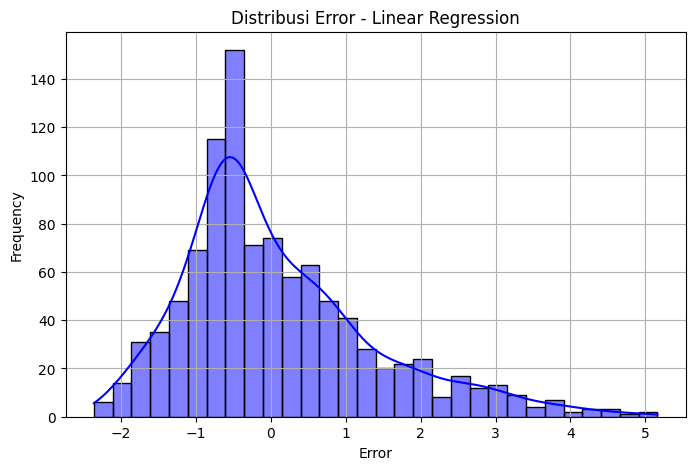

In [289]:
# Hitung error untuk Linear Regression
error_linear = y_test - y_pred_linear

# Visualisasi distribusi error Linear Regression
plt.figure(figsize=(8, 5))
sns.histplot(error_linear, kde=True, color='blue', bins=30)
plt.title('Distribusi Error - Linear Regression')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Distribusi error menunjukkan selisih antara nilai prediksi dan nilai aktual, dimana sumbu horizontal menunjukkan nilai error (prediksi - aktual), sedangkan sumbu vertikal menunjukkan seberapa sering error tersebut muncul (frekuensi). Sebagian besar error berada di sekitar angka 0 hingga -1 yang artinya model sering sedikit mengurangi nilai prediksi dibanding yang sebenarnya. Distribusi error ini tidak terlalu menyebar jauh, meski ada beberapa outlier di sisi kanan, model bekerja dengan cukup baik.

## Evaluasi Polynomial Regression

Mencoba untuk melakukan prediksi pada data simulasi baru

In [290]:
# Simulasi data baru dari X_test
X_new_simulated = X_test.sample(n=5, random_state=42)

# Prediksi nilai BMI dari data baru tersebut
y_pred_new = poly_pipeline.predict(X_new_simulated)

# Tampilkan hasil
hasil_df = X_new_simulated.copy()
hasil_df["Predicted_BMI"] = y_pred_new
print("\nPreview tabel prediksi:")
print(hasil_df)


Preview tabel prediksi:
      Age  Gender  Height_cm  Weight_kg  Daily_Steps  Exercise_Frequency  \
3707   72  Female        158        111         3703                   0   
828    26  Female        181         63        14242                   0   
2664   78    Male        157         92        13544                   1   
1047   49  Female        174        102         4043                   3   
3197   50    Male        169         79         3883                   4   

      Sleep_Hours Alcohol_Consumption Smoking_Habit Dietary_Habits  \
3707          7.4                  No            No     Vegetarian   
828           9.6                  No            No        Regular   
2664          9.1                  No           Yes     Vegetarian   
1047          8.2                  No            No        Regular   
3197          8.6                 Yes            No           Keto   

      Caloric_Intake  Protein_Intake  Carbohydrate_Intake  Fat_Intake  \
3707            3369    

Visualisasi Prediksi vs Data Sebenarnya

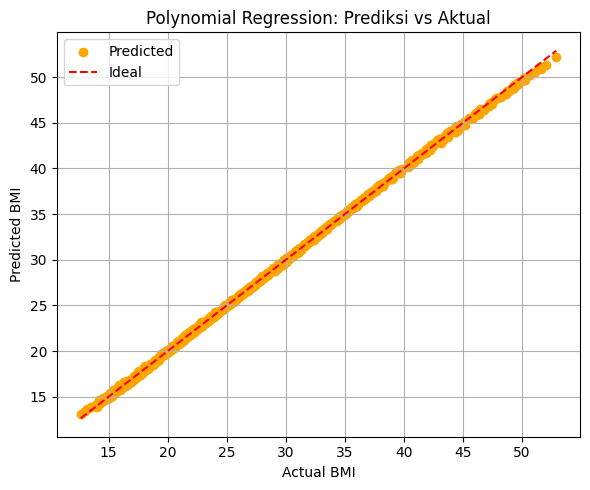

In [291]:
# Visualisasi
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_poly, color='orange', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title("Polynomial Regression: Prediksi vs Aktual")
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan grafik perbandingan antara nilai BMI aktual dan nilai prediksi dari model Polynomial Regression dapat dilihat titik-titik oranye mewakili hasil prediksi, sedangkan garis merah putus-putus adalah garis ideal. Karena sebagian besar titik berada sangat dekat atau tepat di atas garis ideal, ini menandakan bahwa model Polynomial Regression memberikan prediksi yang sangat akurat dan mendekati nilai sebenarnya.

Distribusi error untuk polynomial regression

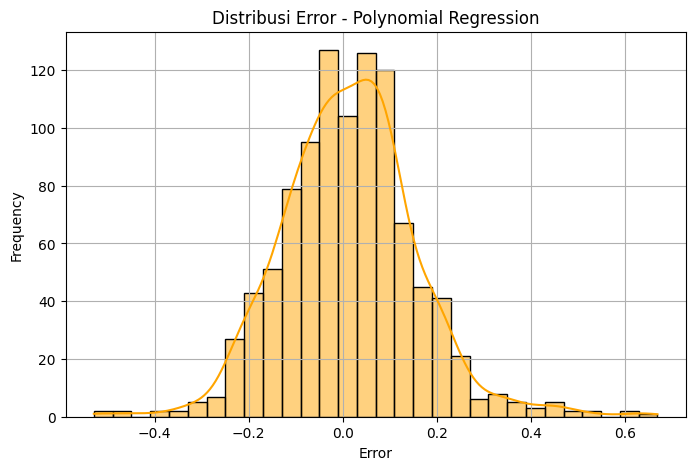

In [292]:
# Hitung error untuk Polynomial Regression
error_poly = y_test - y_pred_poly

# Visualisasi distribusi error Polynomial Regression
plt.figure(figsize=(8, 5))
sns.histplot(error_poly, kde=True, color='orange', bins=30)
plt.title('Distribusi Error - Polynomial Regression')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Distribusi error dari model Polynomial Regression menunjukkan bahwa error tersebar simetris dan mengelompok di sekitar nol, yang berarti prediksi model umumnya sangat dekat dengan nilai sebenarnya. Bentuk distribusinya yang mendekati normal menandakan bahwa model bekerja dengan baik dan tidak memiliki bias sistematis dalam memprediksi BMI.

# Analisis Hasil

Setelah dilakukan tahapan mulai dari eksplorasi data, pembersihan data, seleksi fitur, hingga pemodelan regresi, diperoleh bahwa:

**1.   Perbandingan antara Linear dan Polynomial Regression dalam Prediksi BMI**
*   **Linear Regression** cukup efektif, terutama karena BMI memang secara logika dibentuk langsung dari berat dan tinggi badan. Hal ini terlihat dari kuatnya korelasi antara Weight_kg (positif) dan Height_cm (negatif) terhadap BMI. Tapi di sisi lain, fitur-fitur gaya hidup seperti Exercise_Frequency, Caloric_Intake, dan Sleep_Hours hanya menunjukkan korelasi yang sangat lemah, sehingga kurang memberikan kontribusi signifikan dalam model linier.
*  ** Polynomial Regression** mampu menangkap pola-pola non-linear yang lebih kompleks. Hasil evaluasi memperlihatkan bahwa Polynomial Regression memiliki R² lebih tinggi, serta nilai error (MAE dan MSE) yang lebih rendah dibanding model linier, khususnya di data testing. Ini menunjukkan bahwa fitur-fitur tambahan mungkin memiliki pengaruh yang lebih kompleks terhadap BMI, meskipun korelasinya tidak tinggi secara linier. Distribusi error (residual) dari model Polynomial juga terlihat cukup ideal, berbentuk normal, simetris, dan terpusat di sekitar nol. Hal ini menandakan bahwa model mampu melakukan prediksi dengan stabil.

2.   Model Polynomial Regression sangat sempurna sehingga perlu dicurigai terjadinya overfitting. Dari visualisasi yang ada, tidak terlihat gejala overfitting yang mencolok. Namun, karena belum ada perbandingan skor model di data training dan data testing, belum bisa disimpulkan secara penuh. Model Polynomial Regression cenderung bisa menyesuaikan data training dengan sangat baik, dikhawatirkan model kehilangan generalisasi saat digunakan untuk data baru. Sehingga, beberapa hal masih bisa dilakukan misalya dengan membuat learning curve untuk melihat performa model saat ukuran data bertambah, atau dengan menghitung metrik evaluasi yang sama pada data training untuk membandingkan performa model di data yang dikenalnya dan data baru.

3.   Dari hasil korelasi, dapat dilihat bahwa BMI sangat dipengaruhi oleh Weight_kg dan Height_cm, sementara fitur gaya hidup seperti pola makan atau kebiasaan olahraga tidak punya korelasi kuat secara langsung. Namun, umumnya diketahui bahwa pola makan dan kebiasaan olahraga mempengaruhi berat badan, yang kemudian berdampak pada BMI. Jadi, ada kemungkinan adanya pengaruh tidak langsung yang tidak terdeteksi lewat korelasi Pearson biasa. Untuk langkah analisis berikutnya, bisa mencoba pendekatan bertahap dengan memodelkan berat badan berdasarkan pola makan dan aktivitas dahulu, lalu memodelkan BMI dari berat dan tinggi badan. Selain itu, juga bisa melakukan feature engineering dengan membuat rasio-rasio baru seperti perbandingan protein terhadap kalori, indeks aktivitas, atau kombinasi logika lainnya yang relevan. Terakhir, penting juga untuk menambahkan data baru dan menguji model pada data yang benar-benar belum pernah dilihat sebelumnya agar bisa mengetahui seberapa baik model bekerja secara umum.

4.  Model Polynomial Regression saat ini menunjukkan performa yang unggul dan stabil untuk memprediksi BMI, karena mampu menangkap hubungan non-linear yang tidak bisa dijangkau oleh model linier. Namun, tetap perlu dilakukan analisis tambahan untuk memastikan bahwa tidak terjadi overfitting, serta eksplorasi lebih dalam terhadap fitur gaya hidup yang mungkin punya dampak tidak langsung terhadap BMI.



